In [4]:
# commands for the terminal/console
conda install mamba -n base -c conda-forge
mamba create -n appendicitis_env python=3.10 pandas tensorflow seaborn scikit-learn
conda activate appendicitis_env
pip install ucimlrepo # for getting the uci data

Channels:
 - conda-forge
 - rapidsai
 - nvidia
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/fabianburki/miniconda3

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.3             |     pyhd8ed1ab_0          48 KB  conda-forge
    c-ares-1.28.1              |       h10d778d_0         149 KB  conda-forge
    conda-24.3.0               |  py312hb401068_0         1.1 MB  conda-forge
    libcurl-8.7.1              |       h726d00d_0         369 KB  conda-forge
    libmamba-1.5.8             |       ha449628_0         1.2 MB  conda-forge
    libmambapy-1.5.8           |  py312h67f5953_0         266 KB  conda-forge
    mamba-1.5.8                |  py312ha12221d_0          64 KB  conda-forge
    openssl-3.3.0              |       hd75f5a5_0         2.4 MB  conda-forge
    -----------

In [20]:
!pip install simpletransformers
!pip install ucimlrepo
!pip3 install torch torchvision torchaudio
!pip install python-dotenv # to read for .env file
!pip install openpyxl # for reading xls file
!pip install xlrd
!pip install tensorflow_datasets


  Using cached tensorflow_datasets-4.9.4-py3-none-any.whl.metadata (9.2 kB)
  Using cached dm_tree-0.1.8-cp310-cp310-macosx_10_9_x86_64.whl.metadata (1.9 kB)
  Using cached etils-1.7.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached tensorflow_metadata-1.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached tensorflow_datasets-4.9.4-py3-none-any.whl (5.1 MB)
Using cached etils-1.7.0-py3-none-any.whl (152 kB)
Using cached dm_tree-0.1.8-cp310-cp310-macosx_10_9_x86_64.whl (115 kB)
Using cached tensorflow_metadata-1.15.0-py3-none-any.whl (28 kB)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully 

In [7]:
conda list

# packages in environment at /Users/fabianburki/miniconda3/envs/appendicitis_env:
#
# Name                    Version                   Build  Channel
absl-py                   2.1.0              pyhd8ed1ab_0    conda-forge
aiohttp                   3.9.5           py310hb372a2b_0    conda-forge
aiosignal                 1.3.1              pyhd8ed1ab_0    conda-forge
appnope                   0.1.4              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
astunparse                1.6.3              pyhd8ed1ab_0    conda-forge
async-timeout             4.0.3              pyhd8ed1ab_0    conda-forge
attrs                     23.2.0             pyh71513ae_0    conda-forge
blinker                   1.8.1              pyhd8ed1ab_0    conda-forge
brotli                    1.1.0                h0dc2134_1    conda-forge
brotli-bin                1.1.0                h0dc2134_1    conda-forge
brotli-python             1.1.0           py31

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

2024-06-15 16:08:20.598102: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load the non-image data from the regensburg pediatric appendicitis data set

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 

# metadata 
print(regensburg_pediatric_appendicitis.metadata) 
  
# variable information 
print(regensburg_pediatric_appendicitis.variables) 


{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

Store the features and targets from the data set

In [2]:
# data (as pandas dataframes) 
import pandas as pd
rpa_features = pd.DataFrame(regensburg_pediatric_appendicitis.data.features)
rpa_targets = regensburg_pediatric_appendicitis.data.targets 

In [3]:
rpa_features.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [5]:
rpa_targets.head()

,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis


Remove rows with NAs in target data frame

In [1]:
rpa_targets_cleaned = rpa_targets.loc[rpa_targets.notna().all(axis=1)]

NameError: name 'rpa_targets' is not defined

Combine the targets to keep only information about diagnosis and severity in one column

In [5]:
def check_dx(row): 
    if row['Diagnosis'] == 'no appendicitis':
        return 'no appendicitis'
    return row['Severity']
    
rpa_targets_cleaned['Dx_inclSeverity'] = rpa_targets_cleaned.apply(check_dx, axis=1)
# axis=1 means apply function per row

/var/folders/3b/qp59k9pj1_dcb075s8_dvpc00000gp/T/ipykernel_6130/1956955833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpa_targets_cleaned['Dx_inclSeverity'] = rpa_targets_cleaned.apply(check_dx, axis=1)


In [32]:
rpa_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [9]:
rpa_features.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000


In [6]:
# from https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45:
# see which features are objects (categorial) and which aren't (numeric)
cat_df = rpa_features.select_dtypes(include=['object'])
num_df = rpa_features.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
Sex
Appendix_on_US
Migratory_Pain
Lower_Right_Abd_Pain
Contralateral_Rebound_Tenderness
Coughing_Pain
Nausea
Loss_of_Appetite
Neutrophilia
Ketones_in_Urine
RBC_in_Urine
WBC_in_Urine
Dysuria
Stool
Peritonitis
Psoas_Sign
Ipsilateral_Rebound_Tenderness
US_Performed
Free_Fluids
Appendix_Wall_Layers
Target_Sign
Appendicolith
Perfusion
Perforation
Surrounding_Tissue_Reaction
Appendicular_Abscess
Abscess_Location
Pathological_Lymph_Nodes
Lymph_Nodes_Location
Bowel_Wall_Thickening
Conglomerate_of_Bowel_Loops
Ileus
Coprostasis
Meteorism
Enteritis
Gynecological_Findings

Numeric columns:
Age
BMI
Height
Weight
Length_of_Stay
Alvarado_Score
Paedriatic_Appendicitis_Score
Appendix_Diameter
Body_Temperature
WBC_Count
Neutrophil_Percentage
Segmented_Neutrophils
RBC_Count
Hemoglobin
RDW
Thrombocyte_Count
CRP


Check for missing values

In [8]:
# from https://medium.com/bitgrit-data-science-publication/data-cleaning-with-python-f6bc3da64e45:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(rpa_features)

Age => 1
BMI => 27
Sex => 2
Height => 26
Weight => 3
Length_of_Stay => 4
Alvarado_Score => 52
Paedriatic_Appendicitis_Score => 52
Appendix_on_US => 5
Appendix_Diameter => 284
Migratory_Pain => 9
Lower_Right_Abd_Pain => 8
Contralateral_Rebound_Tenderness => 15
Coughing_Pain => 16
Nausea => 8
Loss_of_Appetite => 10
Body_Temperature => 7
WBC_Count => 6
Neutrophil_Percentage => 103
Segmented_Neutrophils => 728
Neutrophilia => 50
RBC_Count => 18
Hemoglobin => 18
RDW => 26
Thrombocyte_Count => 18
Ketones_in_Urine => 200
RBC_in_Urine => 206
WBC_in_Urine => 199
CRP => 11
Dysuria => 29
Stool => 17
Peritonitis => 9
Psoas_Sign => 37
Ipsilateral_Rebound_Tenderness => 163
US_Performed => 4
Free_Fluids => 63
Appendix_Wall_Layers => 564
Target_Sign => 644
Appendicolith => 713
Perfusion => 719
Perforation => 701
Surrounding_Tissue_Reaction => 530
Appendicular_Abscess => 697
Abscess_Location => 769
Pathological_Lymph_Nodes => 579
Lymph_Nodes_Location => 661
Bowel_Wall_Thickening => 683
Conglomerate_of_

### Data Cleaning

In [9]:
# join features and targets for data cleaning
rpa_combined = rpa_features.join(rpa_targets_cleaned)
# copy the data frame to restore mistakes
# (if not copied the the new variable references the SAME data frame)
rpa_combined_cleaning = rpa_combined.copy()



In [10]:
# define the variable groups (as defined by the data originaters)
clinical_group = ['Peritonitis', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Ipsilateral_Rebound_Tenderness', 'Coughing_Pain', 'Psoas_Sign', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature', 'Dysuria', 'Stool']
laboratory_group = ['WBC_Count', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'Neutrophil_Percentage', 'Neutrophilia', 'Segmented_Neutrophils', 'CRP', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine']
ultrasound_group = ['US_Performed', 'Appendix_on_US', 'Appendix_Diameter', 'Free_Fluids', 'Appendix_Wall_Layers', 'Target_Sign', 'Perfusion', 'Surrounding_Tissue_Reaction', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Appendicolith', 'Perforation', 'Appendicular_Abscess', 'Abscess_Location', 'Conglomerate_of_Bowel_Loops', 'Gynecological_Findings']
demographic_group = ['Age', 'Sex', 'Height', 'Weight', 'BMI', 'Length_of_Stay']

Renaming values

In [13]:
# convert 'NaN' strings to actual nan
rpa_combined_cleaning.replace('NaN', np.nan, inplace=True)

Look at outliers

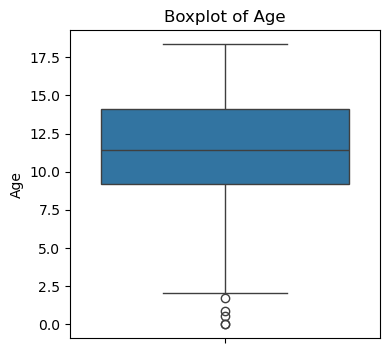

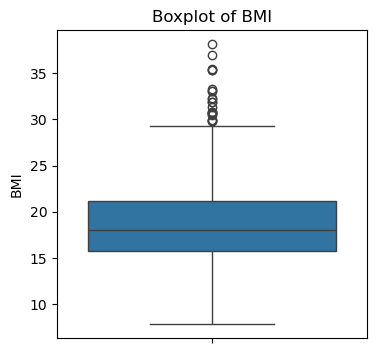

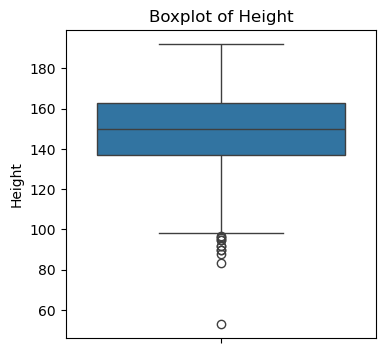

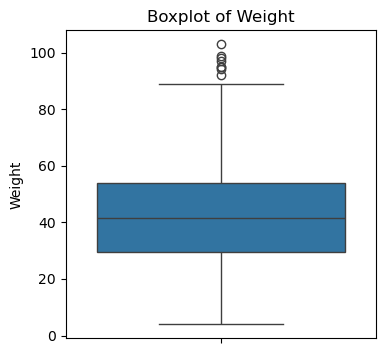

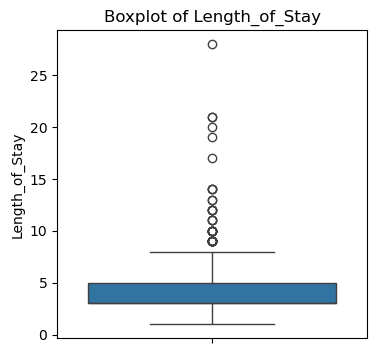

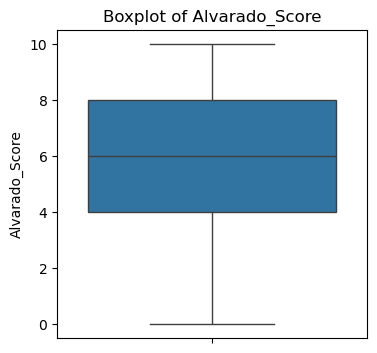

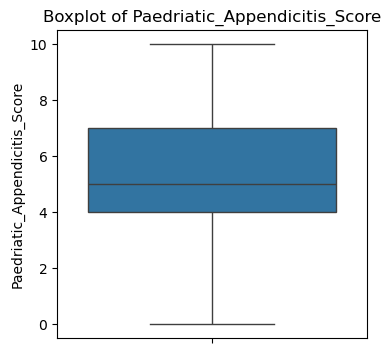

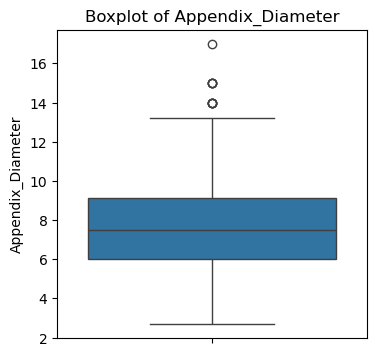

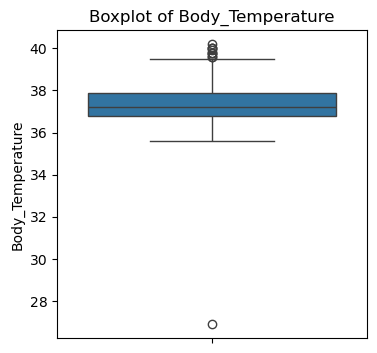

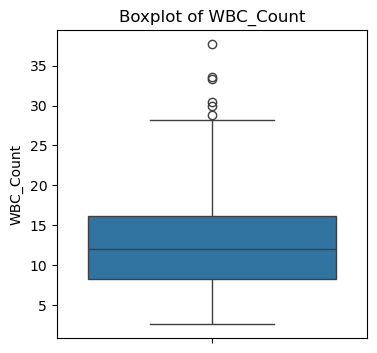

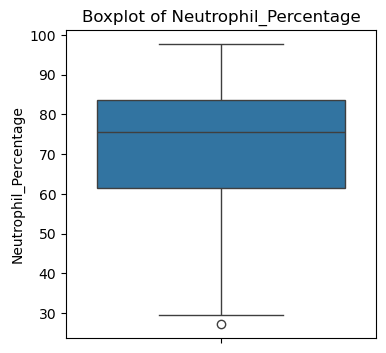

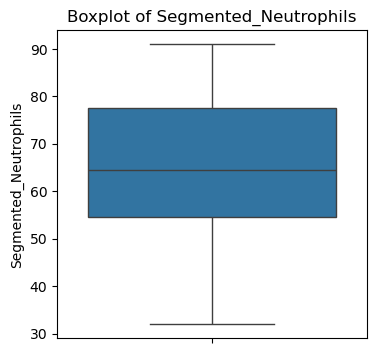

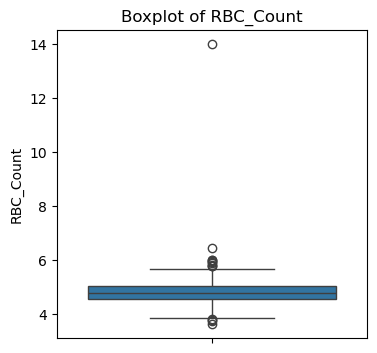

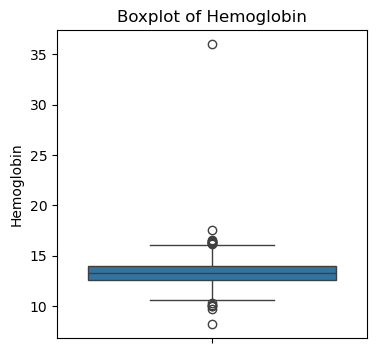

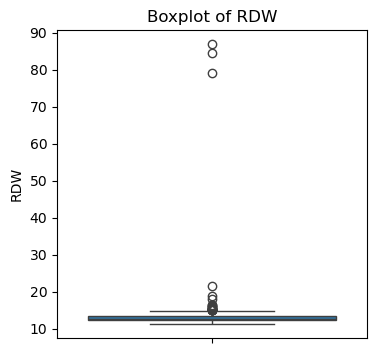

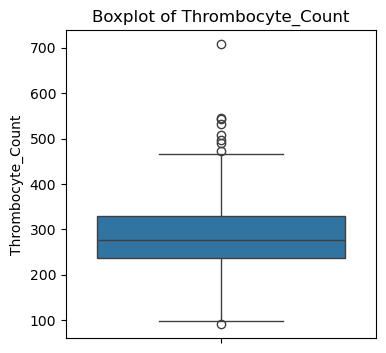

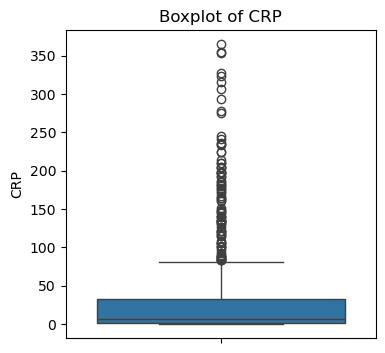

In [14]:
# find outliers
import seaborn as sns 
# select only numeric columns
numeric_columns = rpa_combined_cleaning.select_dtypes(include='number').columns
# create a boxplot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=rpa_combined_cleaning[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [15]:
# handle outliers
rpa_combined_cleaning = rpa_combined_cleaning.drop([221]) # body_temperature 26.9 celsius degree not viable
rpa_combined_cleaning = rpa_combined_cleaning.drop([203]) # RBC_Count 14 G/L massive outlier
rpa_combined_cleaning = rpa_combined_cleaning.drop([564]) # hemoglobin 34 g/L not plausible

### Remove NAs

Set NAs to zero

In [16]:
""" not suitable for neural network since data in collumn becomes strings: 
# rename the appendix_diameter entries to 'not_found_on_us' if Appendix_on_US is 'no' (almost all NA) 
rpa_combined_cleaning.loc[rpa_combined_cleaning['Appendix_on_US'] == 'no', 'Appendix_Diameter'] = 'not_found_on_us'
"""
# set appendix_diameter entries to zero if Appendix_on_US is 'no' (almost all NA)
rpa_combined_cleaning.loc[rpa_combined_cleaning['Appendix_on_US'] == 'no', 'Appendix_Diameter'] = 0

# reconsider this while evaluating the model

Calculate missing values

In [17]:
# calculate missing BMI in one row
rpa_combined_cleaning.loc[550, 'BMI'] = rpa_combined_cleaning.loc[550, 'Weight'] / ((rpa_combined_cleaning.loc[550, 'Height']/100) * (rpa_combined_cleaning.loc[550, 'Height']/100))

Convert NAs in clinical group to "unknown"

In [18]:
clinical_group_mod = clinical_group.remove('Body_Temperature') # remove numeric collumns from group
# create dictionary to map each prefixed column name to the replacement value 'unknown'
fill_clin_na_dict = {col: 'unknown' for col in clinical_group}
# replace NAs in findings with 'Unknown'
rpa_combined_cleaning.fillna(fill_clin_na_dict, inplace=True)

Convert NAs in ultrasound group to "no_us_finding"

In [19]:
# select non-numeric columns
non_numeric_columns = rpa_combined_cleaning.select_dtypes(exclude='number').columns
# create dictionary to map non-numeric column to 'no_us_finding'
fill_us_na_dict = {col: 'no_us_finding' for col in non_numeric_columns if col in ultrasound_group}
# replace NAs in the non-numeric columns with 'no_us_finding'
rpa_combined_cleaning.fillna(fill_us_na_dict, inplace=True)

Remove rows

In [20]:
# remove rows with few missing NAs (use loc!!)
# cols = ['Age', 'Sex', 'Length_of_Stay', 'US_Performed', 'Body_Temperature', 'Height', 'Appendix_Diameter', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'WBC_Count', 'RBC_Count', 'Hemoglobin', 'Thrombocyte_Count', 'CRP']
cols = ['Age', 'Sex', 'Length_of_Stay', 'US_Performed', 'Body_Temperature', 'Height', 'Appendix_Diameter', 'WBC_Count', 'RBC_Count', 'Hemoglobin', 'Thrombocyte_Count', 'CRP']
for col in cols:
    rpa_combined_cleaning = rpa_combined_cleaning.loc[rpa_combined_cleaning[col].notna()] # use .loc to access the row!!

In [13]:
""" not suitable for neural network since data in collumn become strings: 

# create dictionary to map each prefixed column name to the replacement value 'no_lab_result'
fill_lab_na_dict = {col: 'no_lab_result' for col in laboratory_group}
# replace NAs in findings with 'Unknown'
rpa_combined_cleaning.fillna(fill_lab_na_dict, inplace=True)

"""

Drop collumns with too many NAs

In [21]:
#  Alvarado_Score & Paedriatic_Appendicitis_Score: 6% missing (45); Neutrophil_Percentage: 13% missing (96); Segmented_Neutrophils 93% missing; Neutrophilia 6% missing; RDW 3% missing and prob no relevant; Ketones_in_Urine, RBC_in_Urine & WBC_in_Urine 25% missing; Dysuria 3% missing and 91% no; Psoas_Sign 4% missing; Ipsilateral_Rebound_Tenderness 20% missing; Free_Fluids 7% missing; 
rpa_combined_cleaning = rpa_combined_cleaning.drop(columns=['Alvarado_Score', 'Paedriatic_Appendicitis_Score', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Neutrophilia', 'RDW', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine'])

Remove faulty data

In [22]:
# select rows via labeled index like rpa_combined_cleaning.loc[[656, 638, 405]])
# drop these rows directly via drop method
rpa_combined_cleaning = rpa_combined_cleaning.drop([656, 638]) # cases with height > 140 cm, but age < 1 -> faulty data

For better overview rename collumns based on variable group

In [19]:
"""
# add prefix to column names based on variable group (as stated in app_data.xlsx)
def add_prefix_to_colgroup_in_df(prefix, colgroup, df):
    # create dict to map col names
    column_map = {col: prefix + col for col in colgroup}
    # rename col using the dict
    df.rename(columns=column_map, inplace=True)

add_prefix_to_colgroup_in_df('CLIN_',clinical_group,rpa_combined_cleaning)
add_prefix_to_colgroup_in_df('LAB_',laboratory_group,rpa_combined_cleaning)
add_prefix_to_colgroup_in_df('US_',ultrasound_group,rpa_combined_cleaning)
add_prefix_to_colgroup_in_df('DEM_',demographic_group,rpa_combined_cleaning)

# create new lists with prefixes for later filtering purposes 
clinical_group_prefixed = ['CLIN_' + item for item in clinical_group]
laboratory_group_prefixed = ['LAB_' + item for item in laboratory_group]
ultrasound_group_prefixed = ['US_' + item for item in ultrasound_group]
demographic_group_prefixed = ['DEM_' + item for item in ultrasound_group]
"""

After cleaning

In [23]:
# after cleaning
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(rpa_combined_cleaning)

no missing values left


Separate features & labels again

In [2]:
# after cleaning, separate features and targets again
rpa_combined_cleaned = rpa_combined_cleaning.copy()
rpa_targets_cleaned = rpa_combined_cleaned[["Management", "Severity", "Diagnosis", "Dx_inclSeverity"]]
rpa_features_cleaned = rpa_combined_cleaned.drop(columns=["Management", "Severity", "Diagnosis", "Dx_inclSeverity"])

NameError: name 'rpa_combined_cleaning' is not defined

## Training preparation

Transform data

In [25]:
rpa_targets_transforming = rpa_targets_cleaned.copy()
rpa_features_transforming = rpa_features_cleaned.copy()

One-hot encode the target labels (v1 with all targets)

In [7]:
# one-hot encode each column
rpa_targets_transformed = pd.get_dummies(rpa_targets_transforming)

NameError: name 'rpa_targets_transforming' is not defined

One-hot encode the target labels (v2 with reduced targets)

In [26]:
# one-hot encode
rpa_targets_transformed = pd.get_dummies(rpa_targets_transforming["Dx_inclSeverity"])

One-hot encode the features

In [27]:
# select categorical columns
categorical_columns = rpa_features_transforming.select_dtypes(include='object').columns

# one-hot encode categorical columns
rpa_features_transforming = pd.get_dummies(rpa_features_transforming, columns=categorical_columns)

Scale numeric data between 0 and 1

In [28]:
# scale numerical data for the neural network to function correctly
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
 
# select numeric columns
numeric_columns = rpa_features_transforming.select_dtypes(include='number').columns

# scale the numeric columns
rpa_features_transforming[numeric_columns] = scaler.fit_transform(rpa_features_transforming[numeric_columns])

In [29]:
rpa_features_transformed = rpa_features_transforming.copy()

In [30]:
# x_train and y_train should be numpy arrays
rpa_features_transformed = np.array(rpa_features_transformed).astype('float32')
rpa_targets_transformed = np.array(rpa_targets_transformed).astype('float32')
"""
# Check shapes
print(f"x_train shape: {rpa_features_transformed.shape}")
print(f"y_train shape: {rpa_targets_transformed.shape}")
"""

'\n# Check shapes\nprint(f"x_train shape: {rpa_features_transformed.shape}")\nprint(f"y_train shape: {rpa_targets_transformed.shape}")\n'

Split into train & test data

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rpa_features_transformed, rpa_targets_transformed, test_size = 0.2)

Model training

In [32]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

/Users/fabianburki/miniconda3/envs/appendicitis_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
model_args = ClassificationArgs()
model_args.num_train_epochs = 5
model_args.learning_rate = 1e-4

#### Model 1 (extremely bad)

In [203]:
# Define the model
model = Sequential([
    Dense(units=256, activation='relu', input_shape=(147,)),
    Dropout(rate=0.4),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=8, activation='softmax')
])
# dense layer has to have as many units as the target data collumns

# Print model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               37888     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 8)                 1032      
                                                                 
Total params: 71816 (280.53 KB)
Trainable params: 71816 (280.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model 2 - with batch norm. and bigger (bit better)

In [79]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
    Dense(units=512, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=y_train.shape[1], activation='softmax')  # classification layer with number of classes in y_train
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               75776     
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [80]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Epoch 1/30
4/4 [==============================] - 3s 115ms/step - loss: 1.2633 - accuracy: 0.4826 - val_loss: 1.0045 - val_accuracy: 0.6983
Epoch 2/30
4/4 [==============================] - 0s 22ms/step - loss: 0.7518 - accuracy: 0.6848 - val_loss: 0.9583 - val_accuracy: 0.6810
Epoch 3/30
4/4 [==============================] - 0s 18ms/step - loss: 0.5865 - accuracy: 0.7783 - val_loss: 0.9333 - val_accuracy: 0.7069
Epoch 4/30
4/4 [==============================] - 0s 17ms/step - loss: 0.4361 - accuracy: 0.8196 - val_loss: 0.9133 - val_accuracy: 0.7069
Epoch 5/30
4/4 [==============================] - 0s 17ms/step - loss: 0.3631 - accuracy: 0.8543 - val_loss: 0.8887 - val_accuracy: 0.7414
Epoch 6/30
4/4 [==============================] - 0s 17ms/step - loss: 0.3374 - accuracy: 0.8848 - val_loss: 0.8656 - val_accuracy: 0.7414
Epoch 7/30
4/4 [==============================] - 0s 19ms/step - loss: 0.2794 - accuracy: 0.9130 - val_loss: 0.8492 - val_accuracy: 0.7241
Epoch 8/30
4/4 [==========

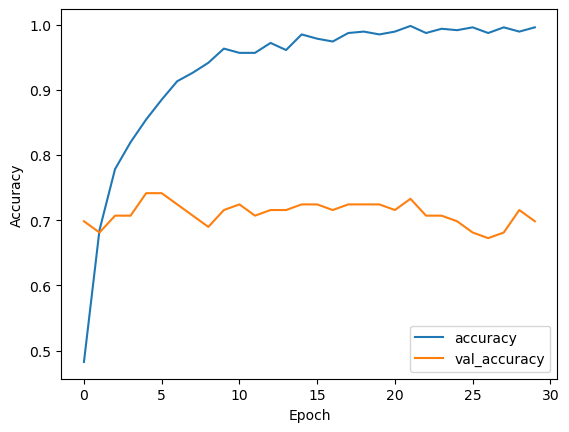

In [81]:
# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Image processing with CNN

Perpare mapping of images to targets (labels)

In [34]:
import pandas as pd
# get mapping info for the image files from app_data.xlsx
df = pd.read_excel('appendicitis_data/app_data.xlsx')
print(df['US_Number'])

0      882.0
1      883.0
2      884.0
3      886.0
4      887.0
       ...  
777    126.0
778      NaN
779    127.0
780    128.0
781    129.0
Name: US_Number, Length: 782, dtype: float64


In [35]:
# join US_Number with rpa_target so the images can be labeled
us_number_df = df[['US_Number']]
us_labeling_map = us_number_df.join(rpa_targets)
# us_labeling_map has 22 missing values, means 22 patients have no ultrasound images


In [36]:
us_labeling_map = us_labeling_map.dropna(subset=['US_Number']) # drop NA for int casting to work
us_labeling_map['US_Number'] = us_labeling_map['US_Number'].astype(int).astype(str) # cast as int for decimal point to disappear in strings


In [37]:
# Remove rows with NAs in target data frame
us_labeling_map = us_labeling_map.loc[rpa_targets.notna().all(axis=1)]
# Combine the targets to keep only information about diagnosis and severity in one column
def check_dx(row): 
    if row['Diagnosis'] == 'no appendicitis':
        return 'no appendicitis'
    return row['Severity']
    
us_labeling_map['Dx_inclSeverity'] = us_labeling_map.apply(check_dx, axis=1)
# axis=1 means apply function per row
us_labeling_map = us_labeling_map.drop(columns=['Management', 'Severity', 'Diagnosis'])

Export data frame to csv so that images can be moved to subdirectories (needed for pipeline)

In [38]:
# Define the path where the CSV will be saved
csv_file_path = 'categories.csv'

# Export the DataFrame to a CSV file
us_labeling_map.to_csv(csv_file_path, sep='\t', index=False)

print(f"DataFrame successfully exported to {csv_file_path}")
# after creation of csv-file, run image_mover.py within the folder containing the images

DataFrame successfully exported to categories.csv


In [13]:
us_labeling_map.head()

,US_Number,Dx_inclSeverity
0,882,uncomplicated
1,883,no appendicitis
2,884,no appendicitis
3,886,no appendicitis
4,887,uncomplicated


Run from within the folder "US_Pictures" the scripts:
- image_mover.py (creates subdirectories and moves the images into them)
- image_cropper.py (cutts off parts like machine info and markings)
- image_composer.py (combines images of the same patients into one)

Load images

In [60]:
# load the directory from the .env-file (US_IMAGES_PATH=r'path/to/the/images/folder')
import os
from dotenv import load_dotenv
load_dotenv()
us_dir = os.getenv('US_IMAGES_PATH')


In [61]:
us_dir = r'/Users/fabianburki/Desktop/BFH/Semester 6/Deep Learning/Projekt/7711412/US_Pictures/US_images_mapped_cropped'

### first approach (skip to 2nd approach)

In [94]:
import os
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Directory containing the images
image_dir = us_dir

# Dictionary to store images and labels
data = []

# Load images and their identifiers
for file_name in os.listdir(image_dir):
    if file_name.endswith(".png") or file_name.endswith(".bmp"):
        identifier = file_name.split('.')[0]  # extract the identifier
        image_path = os.path.join(image_dir, file_name)
        image = Image.open(image_path).convert('RGB')
        data.append((identifier, image))

# Convert to DataFrame
image_df = pd.DataFrame(data, columns=['identifier', 'image'])

In [95]:
# Merge image dataframe with label dataframe
merged_df = pd.merge(image_df, us_labeling_map, left_on='identifier', right_on='US_Number')

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# paper authors resized to 400 × 400 px using zero padding when needed
img_width, img_height = 400, 400

# Prepare images and labels
grouped = merged_df.groupby('identifier')

# Prepare images and labels
img_width, img_height = 400, 400
grouped = merged_df.groupby('identifier')

images = []
labels = []

# since there are multiple images per patient (identifier), the images need to be grouped
for identifier, group in grouped:
    imgs = [img.resize((img_width, img_height)) for img in group['image']]
    img_arrays = [img_to_array(img) / 255.0 for img in imgs]
    avg_img = np.mean(img_arrays, axis=0)
    label = group[['Management', 'Severity', 'Diagnosis']].values[0]
    
    images.append(avg_img)
    labels.append(label)

images = np.array(images, dtype=np.float32)

# Convert labels to categorical
labels = np.array(labels)
label_encoders = [LabelEncoder() for _ in range(labels.shape[1])]

# these encodings are for avoiding value errors that appear during model fitting
encoded_labels = []
for i, label_encoder in enumerate(label_encoders):
    integer_encoded = label_encoder.fit_transform(labels[:, i].astype(str))  # Convert to str if necessary
    one_hot_encoded = to_categorical(integer_encoded)
    encoded_labels.append(one_hot_encoded)

# Combine the one-hot encoded labels
encoded_labels = np.concatenate(encoded_labels, axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)


In [27]:
# terrible model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(encoded_labels.shape[1], activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
15/15 [==============================] - 94s 6s/step - loss: 2737.3401 - accuracy: 0.0778 - val_loss: 17045.4004 - val_accuracy: 0.0000e+00
Epoch 2/20
15/15 [==============================] - 83s 6s/step - loss: 155170.9531 - accuracy: 0.1339 - val_loss: 498266.3125 - val_accuracy: 0.0000e+00
Epoch 3/20
15/15 [==============================] - 75s 5s/step - loss: 1951475.0000 - accuracy: 0.1533 - val_loss: 4378081.5000 - val_accuracy: 0.0000e+00
Epoch 4/20
 6/15 [===========>..................] - ETA: 44s - loss: 7825302.5000 - accuracy: 0.1719

KeyboardInterrupt: 

In [ ]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

In [ ]:
# Binarize the labels
mlb = MultiLabelBinarizer()
binarized_labels = mlb.fit_transform(labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Number of training samples: {len(X_train)}")
print(f"Number of test samples: {len(X_test)}")

### 2nd approach with multi-input & attention (chatgpt)

In [62]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, Multiply, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.activations import softmax
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization



In [63]:
# https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
data_dir = pathlib.Path(us_dir)

See how many images are in the directory

In [64]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

609


#### Load example image from directory

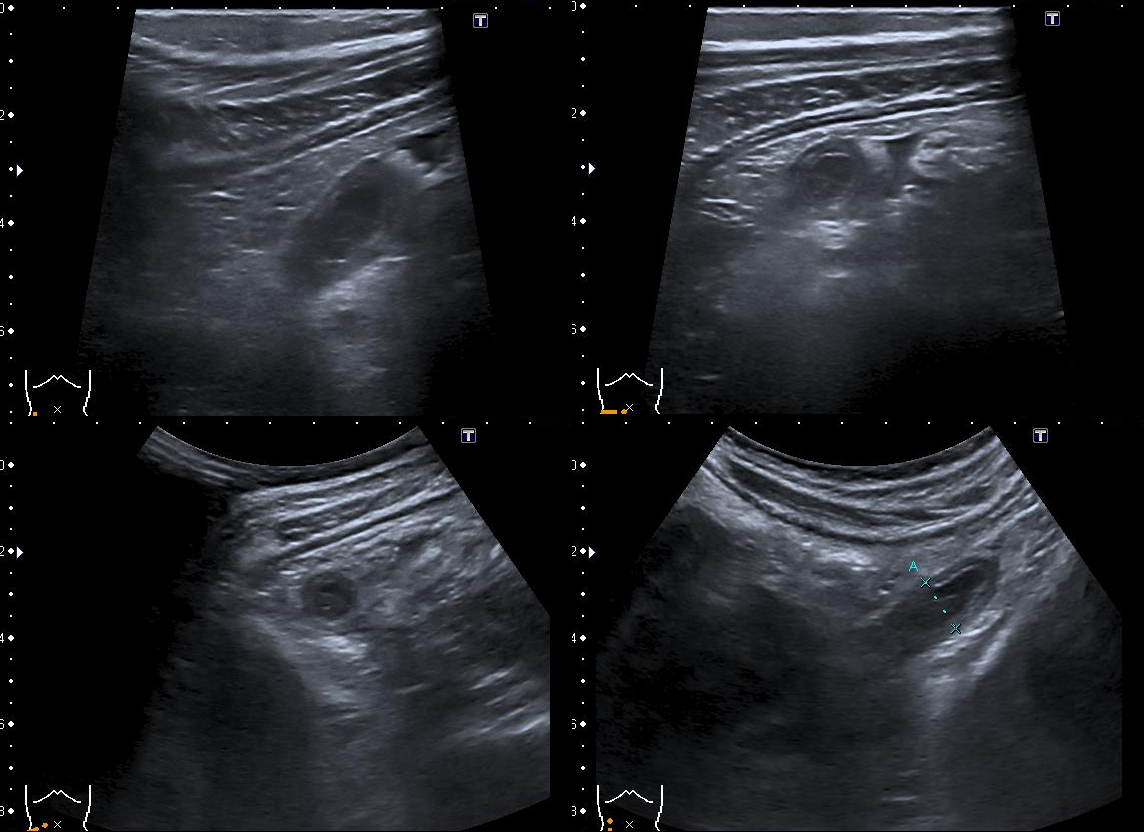

In [65]:
uncomplicated = list(data_dir.glob('uncomplicated/*'))
PIL.Image.open(str(uncomplicated[5]))

### Create pipelines

Pipeline for training data

In [77]:
batch_size = 16
img_height = 400
img_width = 400
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 609 files belonging to 3 classes.
Using 488 files for training.


#### preprocessing with tensors

In [52]:
"""
# Function to crop the image to 80% of the central region
def central_crop(image):
    crop_fraction = 0.8
    cropped_image = tf.image.central_crop(image, crop_fraction)
    return cropped_image

# Apply the central cropping as a preprocessing step
train_ds = train_ds.map(lambda x, y: (central_crop(x), y))

# If you want to include resizing to a fixed size after cropping, you can chain the resizing step:
# train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))

"""

In [55]:
import tensorflow as tf

img_height, img_width = 400, 400  # Example target size for your images
batch_size = 32

# Function to crop the image to 80% of the central region
def central_crop(image):
    crop_fraction = 0.8
    cropped_image = tf.image.central_crop(image, crop_fraction)
    return cropped_image

# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Apply the central cropping as a preprocessing step
train_ds = train_ds.map(lambda x, y: (central_crop(x), y))


Found 609 files belonging to 3 classes.
Using 488 files for training.


In [58]:
import math

# Function to combine images (tensors) into a single composite image
def combine_images(images, img_height, img_width):
    num_images = len(images)
    images_per_row = math.ceil(math.sqrt(num_images))
    num_rows = math.ceil(num_images / images_per_row)

    # Compute the size of the composite image
    composite_width = img_width * images_per_row
    composite_height = img_height * num_rows

    # Create a blank tensor for the composite image
    composite_image = tf.zeros((composite_height, composite_width, 3), dtype=tf.uint8)

    for index, image in enumerate(images):
        row = index // images_per_row
        col = index % images_per_row
        x = col * img_width
        y = row * img_height
        composite_image = tf.tensor_scatter_nd_update(composite_image, [[y, x, 0], [y, x, 1], [y, x, 2]], image)

    return composite_image

# Function to apply central cropping and then combine images in each batch
def preprocess_and_combine(images, labels, img_height, img_width):
    cropped_images = [central_crop(image) for image in images]
    composite_image = combine_images(cropped_images, img_height, img_width)
    return composite_image, labels

# Apply the function to the dataset
train_ds = train_ds.map(lambda x, y: preprocess_and_combine(x, y, img_height, img_width))

OperatorNotAllowedInGraphError: in user code:

    File "/var/folders/3b/qp59k9pj1_dcb075s8_dvpc00000gp/T/ipykernel_6130/2696087334.py", line 32, in None  *
        lambda x, y: preprocess_and_combine(x, y, img_height, img_width)
    File "/var/folders/3b/qp59k9pj1_dcb075s8_dvpc00000gp/T/ipykernel_6130/3819959130.py", line 27, in preprocess_and_combine  *
        cropped_images = [central_crop(image) for image in images]

    OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed. You can attempt the following resolutions to the problem: If you are running in Graph mode, use Eager execution mode or decorate this function with @tf.function. If you are using AutoGraph, you can try decorating this function with @tf.function. If that does not work, then you may be using an unsupported feature or your source code may not be visible to AutoGraph. See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/autograph/g3doc/reference/limitations.md#access-to-source-code for more information.


In [ ]:
# Take one batch from the dataset to check the composite image
for composite_image, labels in train_ds.take(1):
    # Convert the composite image tensor to a NumPy array
    composite_image_np = composite_image.numpy().astype("uint8")

    # Display the composite image using matplotlib
    import matplotlib.pyplot as plt
    plt.imshow(composite_image_np)
    plt.axis('off')  # Hide axes
    plt.show()

#### Pipeline for validation data

In [78]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 609 files belonging to 3 classes.
Using 121 files for validation.


See created labels (via folder names)

In [68]:
class_names = train_ds.class_names
print(class_names)

['complicated', 'no appendicitis', 'uncomplicated']


#### Plot a few of loaded images

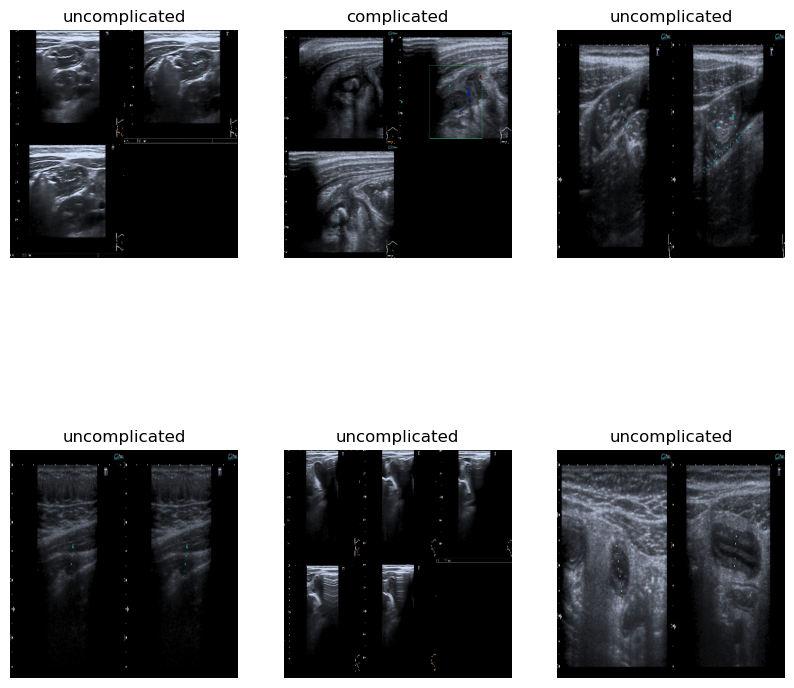

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [39]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)

#### Create a model

##### RGB model with 3 channels

In [86]:
# rgb version
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 3

model = Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(400,400)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

##### Greyscale model with 1 channel

In [19]:
# greyscale version (beware that there are images with doppler mode "_D")
AUTOTUNE = tf.data.AUTOTUNE

def rgb_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)
    return image, label

# Assuming train_ds and val_ds are already defined and loaded with RGB images
train_ds = train_ds.map(rgb_to_grayscale, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(rgb_to_grayscale, num_parallel_calls=AUTOTUNE)

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

#### Compile & train the model

In [80]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Epoch 1/5


/Users/fabianburki/miniconda3/envs/appendicitis_env/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


31/31 [==============================] - 53s 2s/step - loss: 1.0981 - accuracy: 0.5369 - val_loss: 0.9010 - val_accuracy: 0.6281
Epoch 2/5
31/31 [==============================] - 47s 2s/step - loss: 0.8124 - accuracy: 0.6516 - val_loss: 0.9712 - val_accuracy: 0.6033
Epoch 3/5
31/31 [==============================] - 46s 1s/step - loss: 0.6585 - accuracy: 0.7357 - val_loss: 1.1623 - val_accuracy: 0.5702
Epoch 4/5
31/31 [==============================] - 47s 2s/step - loss: 0.4807 - accuracy: 0.8279 - val_loss: 1.3563 - val_accuracy: 0.5868
Epoch 5/5
31/31 [==============================] - 47s 2s/step - loss: 0.3242 - accuracy: 0.8811 - val_loss: 1.1798 - val_accuracy: 0.5785


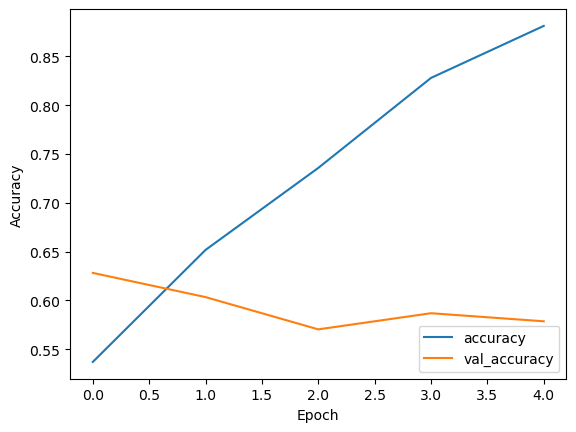

In [81]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [16]:
import os
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Directory containing the images
image_dir = us_dir

# Dictionary to store images and labels
data = []

# Load images and their identifiers
for file_name in os.listdir(image_dir):
    if file_name.endswith(".png") or file_name.endswith(".bmp"):
        identifier = file_name.split('.')[0]  # extract the identifier
        image_path = os.path.join(image_dir, file_name)
        image = Image.open(image_path).convert('RGB')
        data.append((identifier, image))


# Convert to DataFrame
image_df = pd.DataFrame(data, columns=['identifier', 'image'])

### Combine DNN & CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (400, 400, 3)  # Assuming RGB images

# Create the input layer
input_layer = Input(shape=input_shape)

# Create the CNN layers
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
maxpool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(maxpool1)
maxpool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu')(maxpool2)
maxpool3 = MaxPooling2D((2, 2))(conv3)
flatten = Flatten()(maxpool3)

# Create the DNN layers
dense1 = Dense(512, activation='relu')(flatten)
dropout = Dropout(0.5)(dense1)
output_layer = Dense(num_classes, activation='softmax')(dropout)  # Assuming num_classes is defined

# Create the combined model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2024-06-16 22:59:43.963217: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'num_classes' is not defined